# **MNIST Project- LR**


Integrantes de Equipo 3:

*   Esteban Javier Berumen Nieto
*   Gabriela Alejandra de la Fuente Chávez
*   Mariana Salomé García González
*   Hector Alonso Heredia Pérez








1. Leer datos



In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)

Estructura de los datos

In [3]:
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
mnist.data.shape

(70000, 784)

2. Preprocesamiento de datos

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [42]:
X[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254,
       254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 25

Para mejorar la visualización:

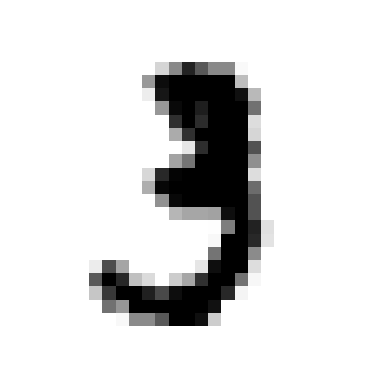

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
idx=10 #change to test other numbers

un_numero = X[idx]
any_digit_image = un_numero.reshape(28,28)
plt.imshow(any_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
#Target
y[idx]

'3'

Crear training y test set

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_test.shape

(10000,)

In [15]:
y_train.shape

(60000,)

3. Creación de Modelo
Para el modelo de Logistic Regression: [Scikit-learn](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression

my_model1 = LogisticRegression(
    penalty='elasticnet',   # Usamos elasticnet para combinar l1 y l2
    solver='saga',          # Usamos 'saga' ya que es compatible con elasticnet
    C=0.5,                  # Control de regularización, 0.5 es más regularización que el valor por defecto
    max_iter=100,
    l1_ratio=0.7           # Ratio entre l1 y l2 para elasticnet
)
my_model2 = LogisticRegression(
    penalty='l1',
    solver='saga',
    C=1.0,
    max_iter=100,
    multi_class='auto'
)

my_model3 = LogisticRegression(
    penalty='l2',
    solver='lbfgs',  # 'lbfgs' soporta penalización l2
    C=0.1,
    max_iter=100,
    multi_class='auto'
)

4. Ajustar el Modelo con Datos Históricos

In [18]:
#Entrenar el modelo
my_model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, l1_ratio=0.7, penalty='elasticnet', solver='saga')

In [19]:
my_model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='auto', penalty='l1', solver='saga')

In [20]:
my_model3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, multi_class='auto')

5. Predicciones para un nuevo dato

In [21]:
my_model1.predict([un_numero])

array(['3'], dtype=object)

In [22]:
my_model2.predict([un_numero])

array(['3'], dtype=object)

In [23]:
my_model3.predict([un_numero])

array(['3'], dtype=object)

In [24]:
X_test.shape

(10000, 784)

In [25]:
y1_predict = my_model1.predict(X_test)

In [26]:
y2_predict = my_model2.predict(X_test)

In [27]:
y3_predict = my_model3.predict(X_test)

In [28]:
y_test[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [29]:
y1_predict[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [30]:
y2_predict[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

In [31]:
y3_predict[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

6. Visualizar resultados

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(my_model1, X_train, y_train, cv=5, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.92133333, 0.91433333, 0.91825   , 0.91308333, 0.92641667])

In [33]:
cross_val_score(my_model2, X_train, y_train, cv=5, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: 

array([0.92125   , 0.91416667, 0.91808333, 0.91291667, 0.92641667])

In [34]:
cross_val_score(my_model3, X_train, y_train, cv=5, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

array([0.91891667, 0.91558333, 0.919     , 0.91183333, 0.92491667])

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y1_predict)
cm

array([[ 960,    0,    0,    3,    1,    4,    6,    3,    2,    1],
       [   0, 1117,    5,    2,    0,    1,    3,    1,    6,    0],
       [   5,   10,  925,   17,    9,    3,   11,   11,   39,    2],
       [   4,    0,   17,  927,    1,   22,    2,    9,   21,    7],
       [   1,    2,    5,    3,  917,    0,    9,    6,   10,   29],
       [  12,    3,    2,   37,   10,  767,   14,    7,   35,    5],
       [   9,    3,    6,    3,    6,   17,  911,    2,    1,    0],
       [   1,    6,   23,    7,    5,    1,    0,  947,    4,   34],
       [   8,   14,    5,   23,    6,   23,    9,   11,  863,   12],
       [   9,    7,    1,    8,   23,    7,    0,   21,    9,  924]])

In [37]:
cm = confusion_matrix(y_test, y2_predict)
cm

array([[ 959,    0,    0,    3,    1,    5,    6,    3,    2,    1],
       [   0, 1117,    5,    2,    0,    1,    3,    1,    6,    0],
       [   5,   10,  925,   17,    9,    3,   11,   11,   39,    2],
       [   4,    0,   17,  926,    1,   22,    2,    9,   22,    7],
       [   1,    2,    6,    3,  917,    0,    8,    6,   10,   29],
       [  12,    3,    2,   37,   10,  767,   14,    7,   35,    5],
       [   9,    3,    6,    3,    6,   17,  911,    2,    1,    0],
       [   1,    6,   23,    7,    5,    1,    0,  947,    4,   34],
       [   8,   14,    5,   23,    6,   23,    9,   11,  863,   12],
       [   9,    7,    1,    8,   23,    7,    0,   21,    9,  924]])

In [38]:
cm = confusion_matrix(y_test, y3_predict)
cm

array([[ 962,    0,    1,    2,    1,    4,    5,    4,    1,    0],
       [   0, 1113,    5,    1,    0,    1,    3,    2,   10,    0],
       [   4,   10,  923,   16,    5,    4,   13,    8,   46,    3],
       [   4,    1,   21,  914,    1,   27,    4,    9,   22,    7],
       [   1,    1,    7,    3,  907,    0,   10,    7,   11,   35],
       [  11,    2,    2,   33,   10,  776,   13,    7,   33,    5],
       [   9,    3,    8,    2,    8,   17,  907,    2,    2,    0],
       [   1,    6,   23,    6,    7,    1,    0,  950,    4,   30],
       [   8,    8,    6,   25,    6,   22,   10,   11,  870,    8],
       [   8,    8,    0,   10,   23,    7,    0,   22,    7,  924]])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y1_predict)

0.9258

In [40]:
accuracy_score(y_test, y2_predict)

0.9256

In [41]:
accuracy_score(y_test, y3_predict)

0.9246